/tmp/ipython-input-1438949325.py:17: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-1438949325.py:17: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipython-input-1438949325.py:17: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


Aperçu des données :


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Aperçu données journalières :


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


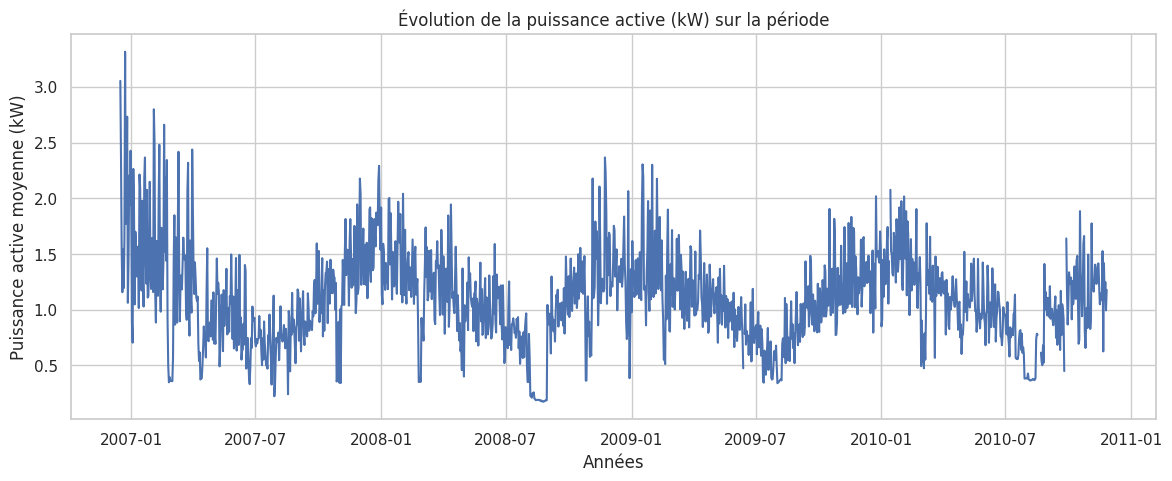

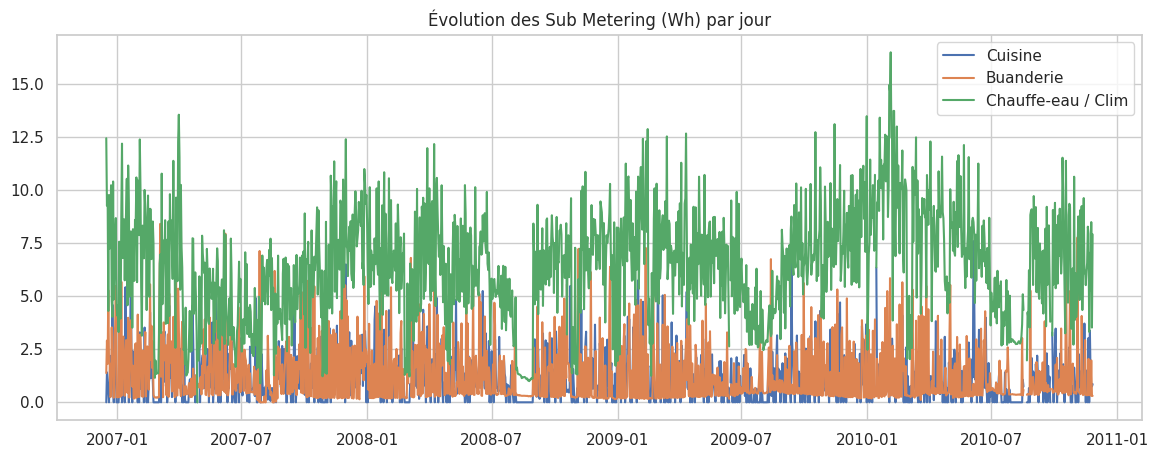

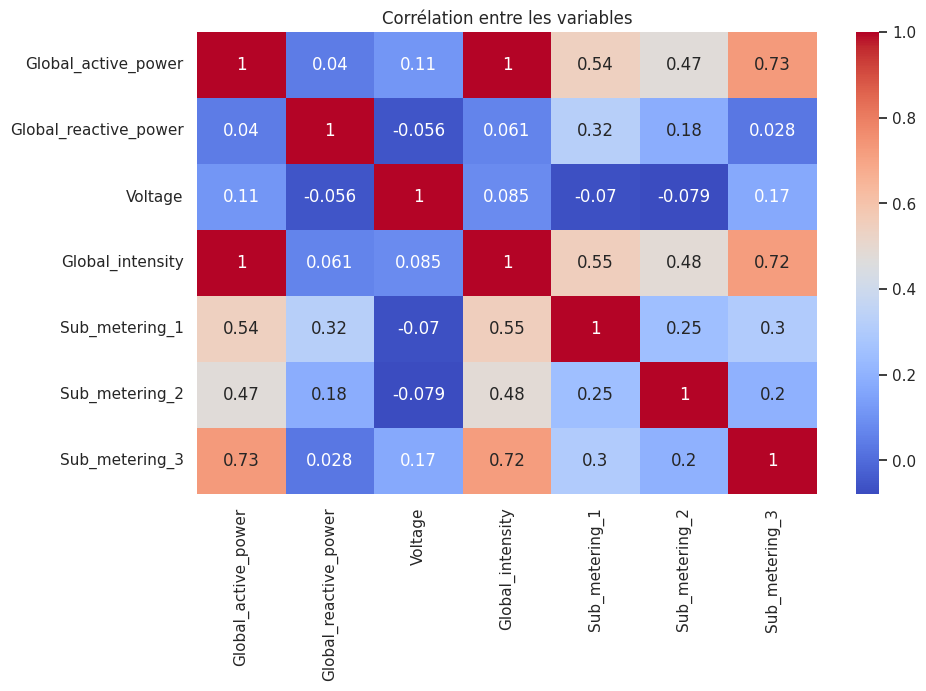

Analyse terminée ! ✔
Taille de l'ensemble d'entraînement (X_train): (1146, 6)
Taille de l'ensemble de test (X_test): (287, 6)

Performance du modèle de régression linéaire :
Erreur Quadratique Moyenne (MSE) : 0.00
Coefficient de Détermination (R²) : 1.00


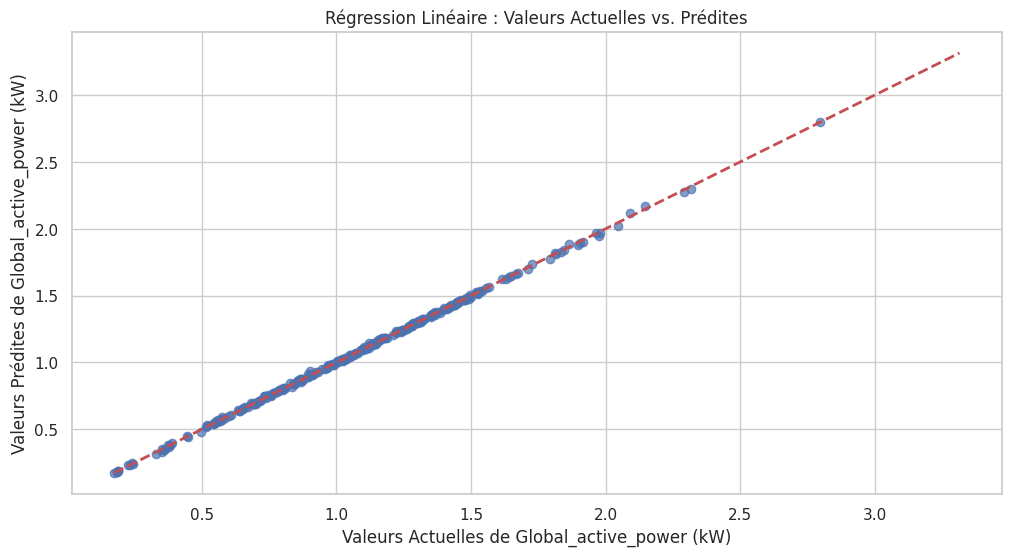

Coefficients du modèle :
Global_reactive_power: -0.2316
Voltage: 0.0046
Global_intensity: 0.2395
Sub_metering_1: -0.0010
Sub_metering_2: -0.0006
Sub_metering_3: 0.0019
Intercept: -1.1061


In [ ]:
# ------------------------------------------
# 1. Importation des bibliothèques
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 5)

# ------------------------------------------
# 2. Chargement du Dataset
# Mettre votre fichier dans Google Colab puis adapter le chemin
# ------------------------------------------
file_path = "/content/household_power_consumption.txt"  # Modifier si nécessaire

df = pd.read_csv(
    file_path,
    sep=';',
    low_memory=False,
    na_values='?',
    parse_dates={'Datetime': ['Date', 'Time']},
    infer_datetime_format=True
)

# ------------------------------------------
# 3. Nettoyage des données
# ------------------------------------------
df = df.dropna()  # Suppression des valeurs manquantes
df.set_index('Datetime', inplace=True)

# Conversion des colonnes en float
for col in df.columns:
    df[col] = df[col].astype(float)

print("Aperçu des données :")
display(df.head())

# ------------------------------------------
# 4.Resampling → données par jour
# ------------------------------------------
df_daily = df.resample('D').mean()

print("Aperçu données journalières :")
display(df_daily.head())

# ------------------------------------------
# 5. Visualisation Consommation globale
# ------------------------------------------
plt.figure()
plt.title("Évolution de la puissance active (kW) sur la période")
plt.plot(df_daily['Global_active_power'])
plt.ylabel("Puissance active moyenne (kW)")
plt.xlabel("Années")
plt.show()

# ------------------------------------------
# 6. Analyse des sous-compteurs
# ------------------------------------------
plt.figure()
plt.title("Évolution des Sub Metering (Wh) par jour")
plt.plot(df_daily[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.legend(['Cuisine', 'Buanderie', 'Chauffe-eau / Clim'])
plt.show()

# ------------------------------------------
# 7. Analyse des corrélations
# ------------------------------------------
corr = df_daily.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()

print("Analyse terminée ! ✔")

# ------------------------------------------
# 7. Regression lineaire
# ------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Préparation des données pour la régression linéaire
X = df_daily.drop('Global_active_power', axis=1)  # Variables explicatives
y = df_daily['Global_active_power']              # Variable cible

# Supprimer les lignes avec des NaN qui pourraient avoir été introduits par le resample si des jours entiers sont manquants
X = X.dropna()
y = y[X.index] # Align y with the cleaned X index

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement (X_train): {X_train.shape}")
print(f"Taille de l'ensemble de test (X_test): {X_test.shape}")

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance du modèle de régression linéaire :")
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de Détermination (R²) : {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
# Ligne de référence y=x
plt.xlabel("Valeurs Actuelles de Global_active_power (kW)")
plt.ylabel("Valeurs Prédites de Global_active_power (kW)")
plt.title("Régression Linéaire : Valeurs Actuelles vs. Prédites")
plt.grid(True)
plt.show()

# Afficher les coefficients du modèle
print("Coefficients du modèle :")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")